<a href="https://colab.research.google.com/github/Rahal-Kanishka/computer-vision/blob/main/Hand_writing_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification of Handwritten Digits

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras

In [19]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_Y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_Y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [20]:
valid_X, train_X = train_X[:30000], train_X[30000:]
valid_Y, train_Y = train_Y[:30000], train_Y[30000:]

## plot images


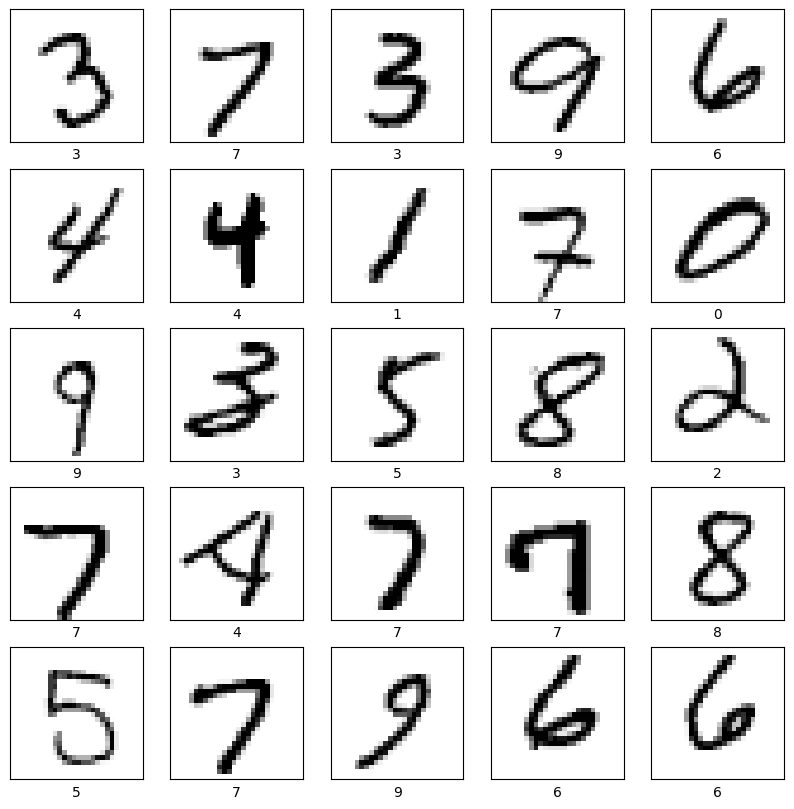

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(train_Y[i])
plt.show()

## Build Nueral network without Convolutional layer

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = 'relu' ),
    keras.layers.Dense(100, activation = 'relu' ),
    keras.layers.Dense(100, activation = 'relu' ),
    keras.layers.Dense(100, activation = 'relu' ),
    keras.layers.Dense(10, activation = 'sigmoid' )])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 286810 (1.09 MB)
Trainable params: 28681

In [27]:


model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'])

In [28]:
history = model.fit(train_X,
                    train_Y,
                    epochs = 10,
                    validation_data = (valid_X, valid_Y))

Epoch 1/10
938/938 [==============================] - 7s 5ms/step - loss: 1.0817 - accuracy: 0.8519 - val_loss: 0.3397 - val_accuracy: 0.9139
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2407 - accuracy: 0.9327 - val_loss: 0.2630 - val_accuracy: 0.9302
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1790 - accuracy: 0.9494 - val_loss: 0.2115 - val_accuracy: 0.9437
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.1606 - accuracy: 0.9541 - val_loss: 0.2042 - val_accuracy: 0.9462
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1352 - accuracy: 0.9607 - val_loss: 0.2159 - val_accuracy: 0.9489
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1254 - accuracy: 0.9652 - val_loss: 0.1886 - val_accuracy: 0.9554
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1067 - accuracy: 0.9696 - val_loss: 0.2211 - val_accuracy: 0.9470
Epoch 

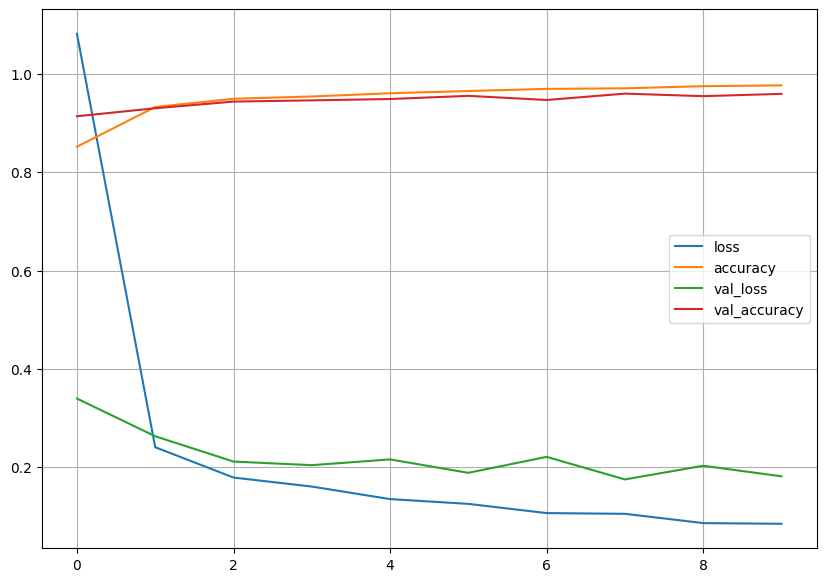

In [35]:
pd.DataFrame(history.history).plot(figsize = (10, 7))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.1667 - accuracy: 0.9616


[0.16668395698070526, 0.9616000056266785]